# Final Project

## Phase 2: Data Tuning and Analysis

In [1]:
library(ggplot2)
library(dplyr)
library(caTools)
library(gridExtra)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [2]:
data <- readRDS('data.rds')

In [3]:
data$Customer.Satisfaction[data$Likelihood.to.recommend>7] <- "High"
data$Customer.Satisfaction[data$Likelihood.to.recommend<=7 & data$Likelihood.to.recommend>4] <- "Med"
data$Customer.Satisfaction[data$Likelihood.to.recommend<=4] <- "Low"
data$Customer.Satisfaction <- factor(as.character(data$Customer.Satisfaction))

In [4]:
data1 <- sample.split(data,SplitRatio = 0.3)
train <- subset(data,data1==FALSE)
rownames(train) <- 1:nrow(train)
test <- subset(data,data1==TRUE)
row.names(test) <- 1:nrow(test)

In [5]:
head(train)

Destination.City,Origin.City,Airline.Status,Age,Gender,Price.Sensitivity,Year.of.First.Flight,Flights.Per.Year,Loyalty,Type.of.Travel,...,Arrival.Delay.in.Minutes,Flight.cancelled,Flight.time.in.minutes,Flight.Distance,Likelihood.to.recommend,olong,olat,dlong,dlat,Customer.Satisfaction
Atlanta,Las Vegas,Silver,75,F,3,2009,35,-0.8421,Personal Travel,...,0,N,191,1747,8,-115.1672,36.1349,-84.3319,33.8241,High
San Francisco,New Orleans,Blue,55,F,1,2005,13,-0.6250,Business travel,...,0,N,257,1911,9,-90.1437,29.9547,-122.1585,37.6712,High
Orlando,Atlanta,Blue,80,M,0,2003,77,-0.9494,Personal Travel,...,0,N,54,404,4,-84.3319,33.8241,-81.4112,28.5844,Low
Chicago,Cleveland,Blue,48,F,2,2012,52,-0.8909,Personal Travel,...,13,N,72,315,4,-81.6054,41.4436,-87.8954,41.8271,Low
Denver,San Francisco,Blue,41,M,1,2009,3,0.4000,Business travel,...,4,N,122,967,8,-122.1585,37.6712,-104.9551,39.7108,High
Kansas City,Milwaukee,Gold,33,M,1,2003,18,-0.3846,Business travel,...,0,N,69,436,9,-88.1005,43.0557,-94.5949,39.0398,High


In [6]:
str(train)

'data.frame':	7379 obs. of  32 variables:
 $ Destination.City              : Factor w/ 195 levels "Aberdeen","Aguadilla",..: 13 157 133 38 50 94 157 13 67 38 ...
 $ Origin.City                   : Factor w/ 192 levels "Aberdeen","Aguadilla",..: 104 128 13 41 157 118 143 176 13 183 ...
 $ Airline.Status                : Factor w/ 4 levels "Blue","Gold",..: 4 1 1 1 1 2 4 1 1 1 ...
 $ Age                           : int  75 55 80 48 41 33 23 45 68 28 ...
 $ Gender                        : Factor w/ 2 levels "F","M": 1 1 2 1 2 2 2 2 2 2 ...
 $ Price.Sensitivity             : int  3 1 0 2 1 1 1 1 2 1 ...
 $ Year.of.First.Flight          : Factor w/ 10 levels "2003","2004",..: 7 3 1 10 7 1 1 2 1 4 ...
 $ Flights.Per.Year              : int  35 13 77 52 3 18 2 0 42 59 ...
 $ Loyalty                       : num  -0.842 -0.625 -0.949 -0.891 0.4 ...
 $ Type.of.Travel                : Factor w/ 3 levels "Business travel",..: 3 1 3 3 1 1 2 1 3 1 ...
 $ Total.Freq.Flyer.Accts        : int  0 0 0 0 

In [7]:
graph_num <- function(col){
    
    df_temp <- train %>%
                filter(Customer.Satisfaction=="High")
    
    plot1 <- ggplot(df_temp,aes_string(x=col)) 
    plot1 <- plot1 + geom_histogram(color="darkblue", fill="lightblue")
    plot1 <- plot1 + ggtitle(paste('Histogram showing High Customer Satisfaction vs ',col))
    
    df_temp <- train %>%
                filter(Customer.Satisfaction=="Med")
    
    plot2 <- ggplot(df_temp,aes_string(x=col)) 
    plot2 <- plot2 + geom_histogram(color="darkblue", fill="yellow")
    plot2 <- plot2 + ggtitle(paste('Histogram showing Med Customer Satisfaction vs ',col))
    
    df_temp <- train %>%
                filter(Customer.Satisfaction=="Low")
    
    plot3 <- ggplot(df_temp,aes_string(x=col)) 
    plot3 <- plot3 + geom_histogram(color="darkred", fill="#FFCCCB")
    plot3 <- plot3 + ggtitle(paste('Histogram showing Low Customer Satisfaction vs ',col))
    
    grid.arrange(plot1,plot2,plot3, nrow = 3)
    
}

In [8]:
graph_factors <- function(col){
    
    dfh <- train %>%
        filter(Customer.Satisfaction=="High")%>%
        group_by(.dots=col)%>%
        summarise(counth=n())

    dfm <- train %>%
        filter(Customer.Satisfaction=="Med")%>%
        group_by(.dots=col)%>%
        summarise(countm=n())
    
    dfl <- train %>%
        filter(Customer.Satisfaction=="Low")%>%
        group_by(.dots=col)%>%
        summarise(countl=n())
    
    dfmerge <- merge(dfh,dfm,by=col)
    dfmerge <- merge(dfmerge,dfl,by=col)
    colnames(dfmerge)[colnames(dfmerge)==col] <- "factor"

    dfmerge$fractionh <- dfmerge$counth/(dfmerge$counth+dfmerge$countm+dfmerge$countl)
    dfmerge$fractionm <- dfmerge$countm/(dfmerge$counth+dfmerge$countm+dfmerge$countl)
    dfmerge$fractionl <- dfmerge$countl/(dfmerge$counth+dfmerge$countm+dfmerge$countl)
    
    if(nrow(dfmerge)<=10){
         dfmerge$factor <- factor(dfmerge$factor, levels = dfmerge$factor[order(-dfmerge$fractionh)])
    }
    else{
         dfmerge$factor <- factor(dfmerge$factor, levels = dfmerge$factor[order(dfmerge$fractionh)])
    }
   
    
    plot1 <- ggplot(dfmerge,aes(y=fractionh, x=factor ,width =.75))
    plot1 <- plot1 + geom_bar(stat='identity',color="darkblue", fill="lightblue")
    if(nrow(dfmerge)>10){
      plot1 <- plot1 + coord_flip()  
    } 
    plot1 <- plot1 + ggtitle(paste('Barplot showing % of High Customer Satisfaction for each ',col))
    plot1 <- plot1 + labs(x=col)
    
    if(nrow(dfmerge)<=10){
         dfmerge$factor <- factor(dfmerge$factor, levels = dfmerge$factor[order(-dfmerge$fractionm)])
    }
    else{
         dfmerge$factor <- factor(dfmerge$factor, levels = dfmerge$factor[order(dfmerge$fractionm)])
    }
   
    
    plot2 <- ggplot(dfmerge,aes(y=fractionm, x=factor ,width =.75))
    plot2 <- plot2 + geom_bar(stat='identity',color="darkblue", fill="yellow")
    if(nrow(dfmerge)>10){
      plot2 <- plot2 + coord_flip()  
    } 
    plot2 <- plot2 + ggtitle(paste('Barplot showing % of Med Customer Satisfaction for each ',col))
    plot2 <- plot2 + labs(x=col)
    
    if(nrow(dfmerge)<=10){
         dfmerge$factor <- factor(dfmerge$factor, levels = dfmerge$factor[order(-dfmerge$fractionl)])
    }
    else{
         dfmerge$factor <- factor(dfmerge$factor, levels = dfmerge$factor[order(dfmerge$fractionl)])
    }
   
    
    plot3 <- ggplot(dfmerge,aes(y=fractionl, x=factor ,width =.75))
    plot3 <- plot3 + geom_bar(stat='identity',color="darkred", fill="#FFCCCB")
    if(nrow(dfmerge)>10){
      plot3 <- plot3 + coord_flip()  
    } 
    plot3 <- plot3 + ggtitle(paste('Barplot showing % of Low Customer Satisfaction for each ',col))
    plot3 <- plot3 + labs(x=col)
    
    
    
     grid.arrange(plot1,plot2,plot3, nrow = 3)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


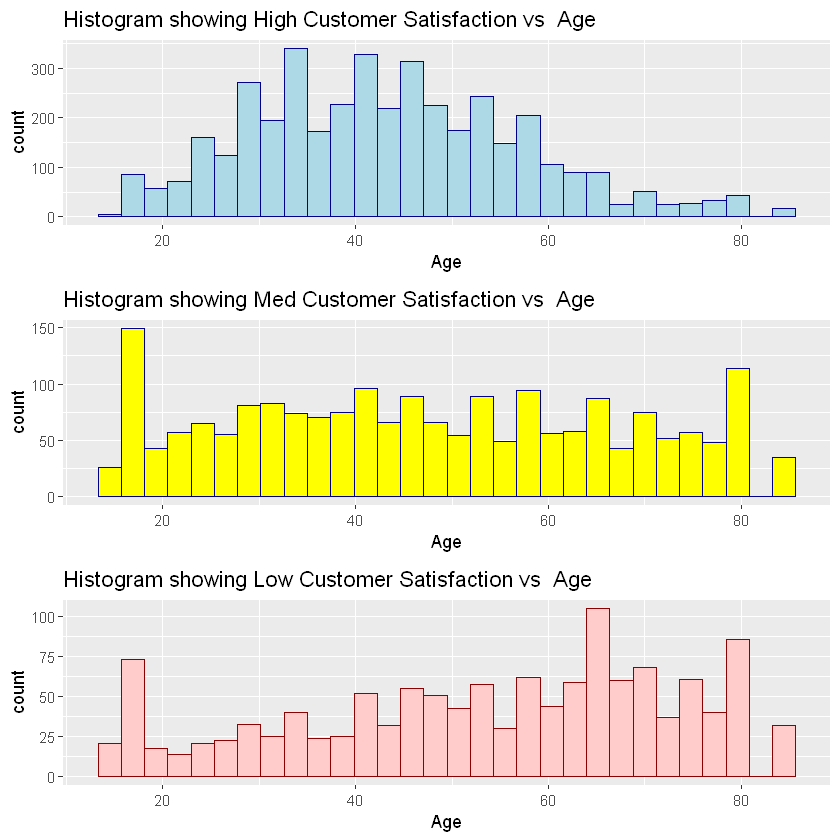

In [9]:
graph_num("Age")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


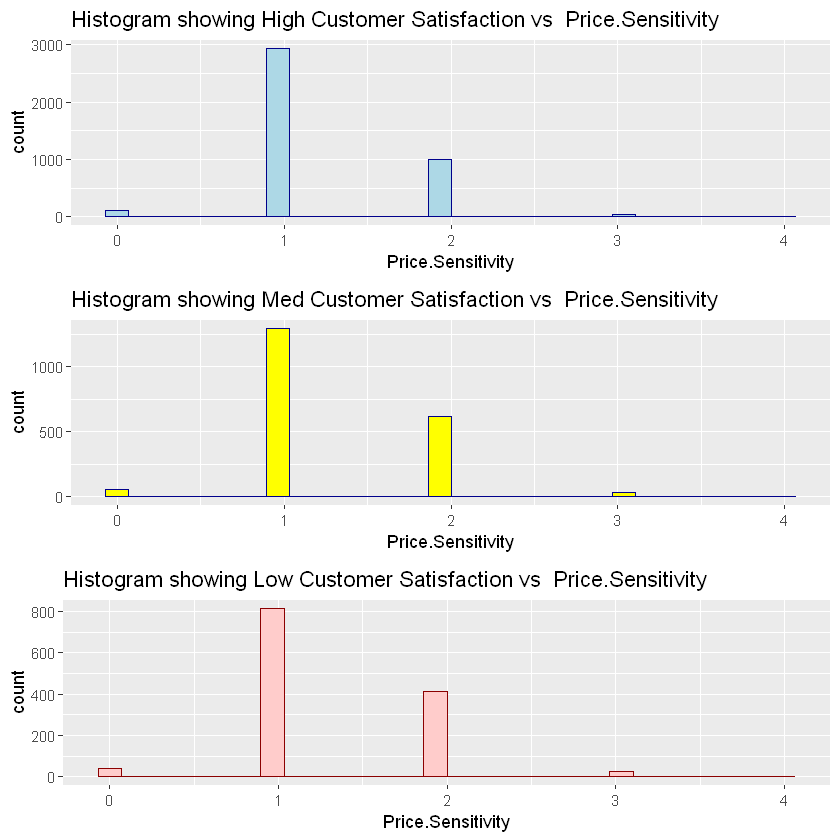

In [10]:
graph_num("Price.Sensitivity")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


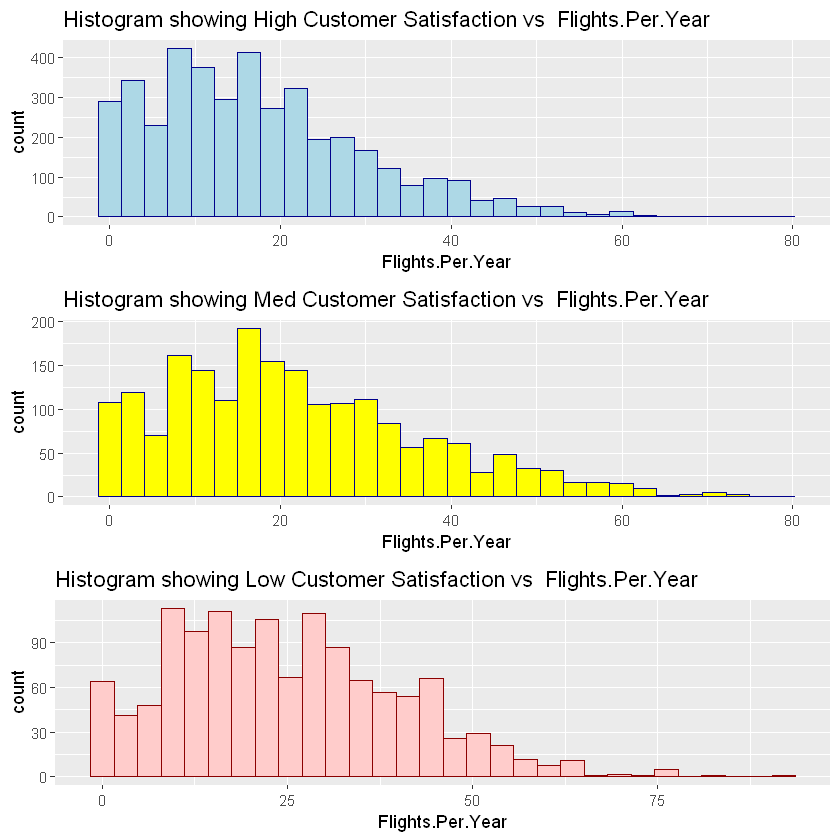

In [11]:
graph_num("Flights.Per.Year")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


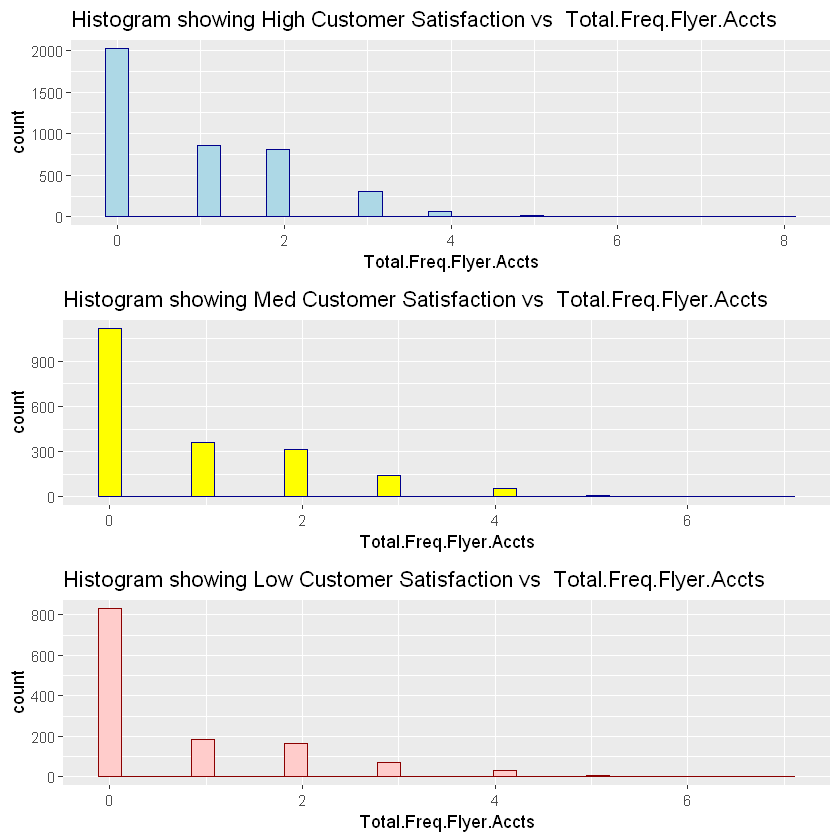

In [12]:
graph_num("Total.Freq.Flyer.Accts")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


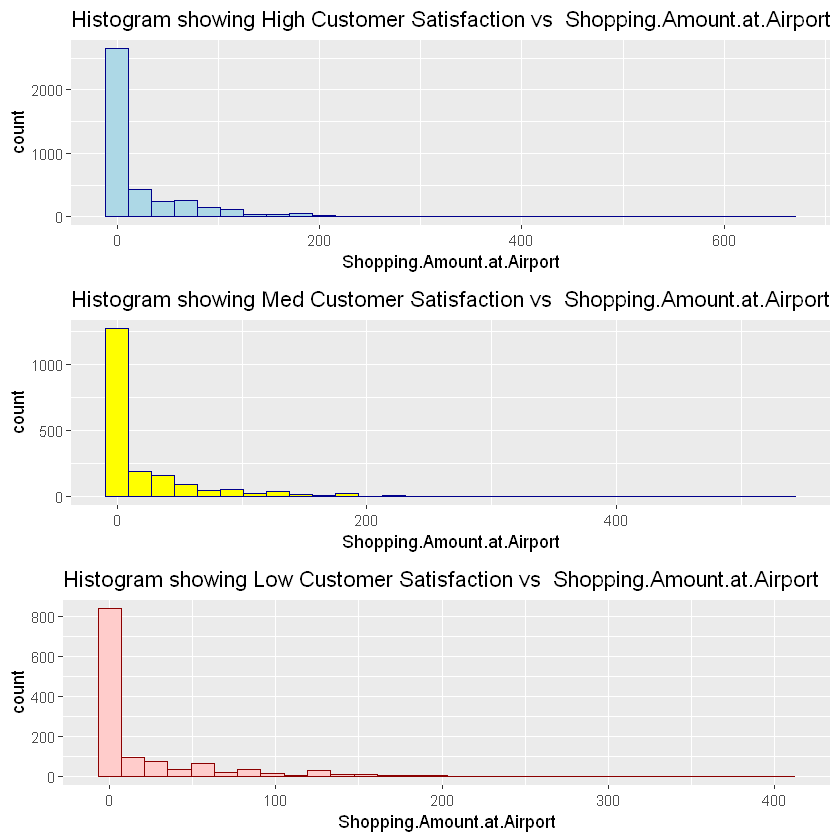

In [13]:
graph_num("Shopping.Amount.at.Airport")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


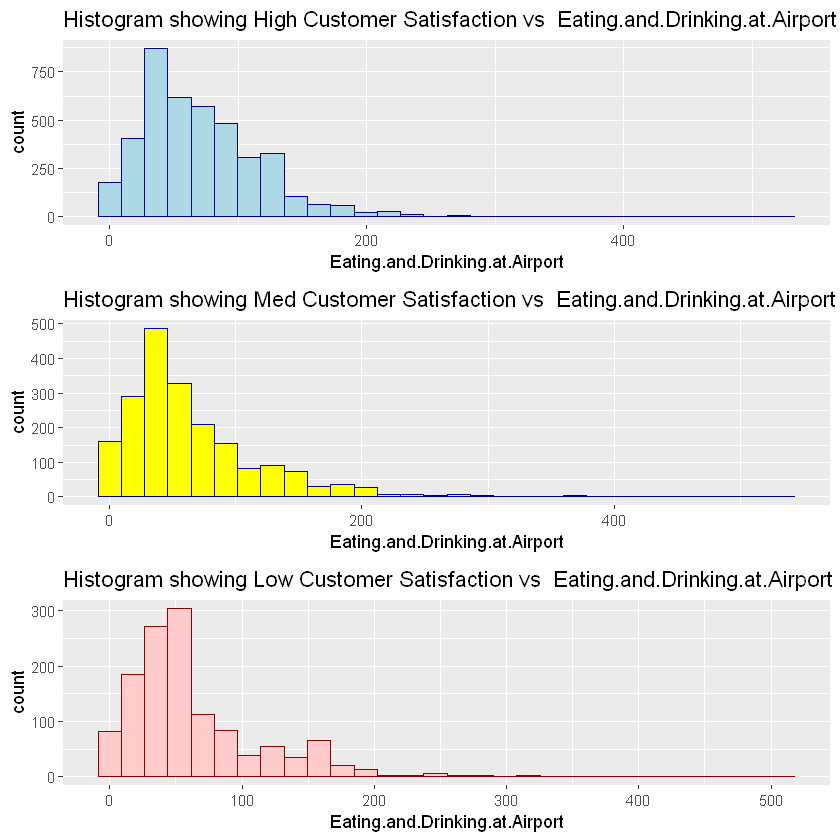

In [14]:
graph_num("Eating.and.Drinking.at.Airport")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


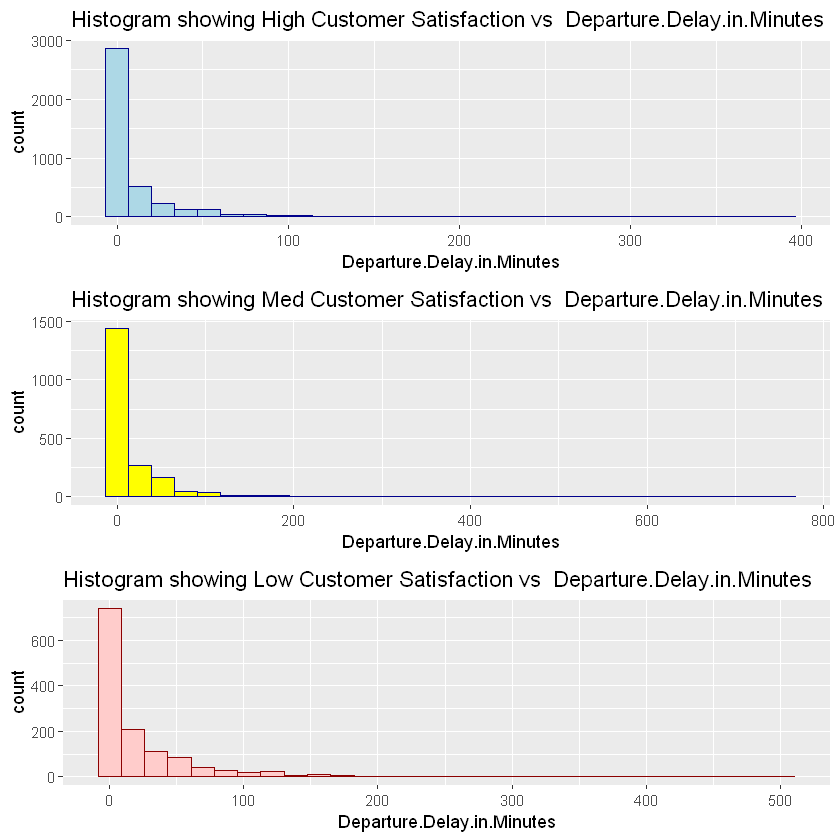

In [15]:
graph_num("Departure.Delay.in.Minutes")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


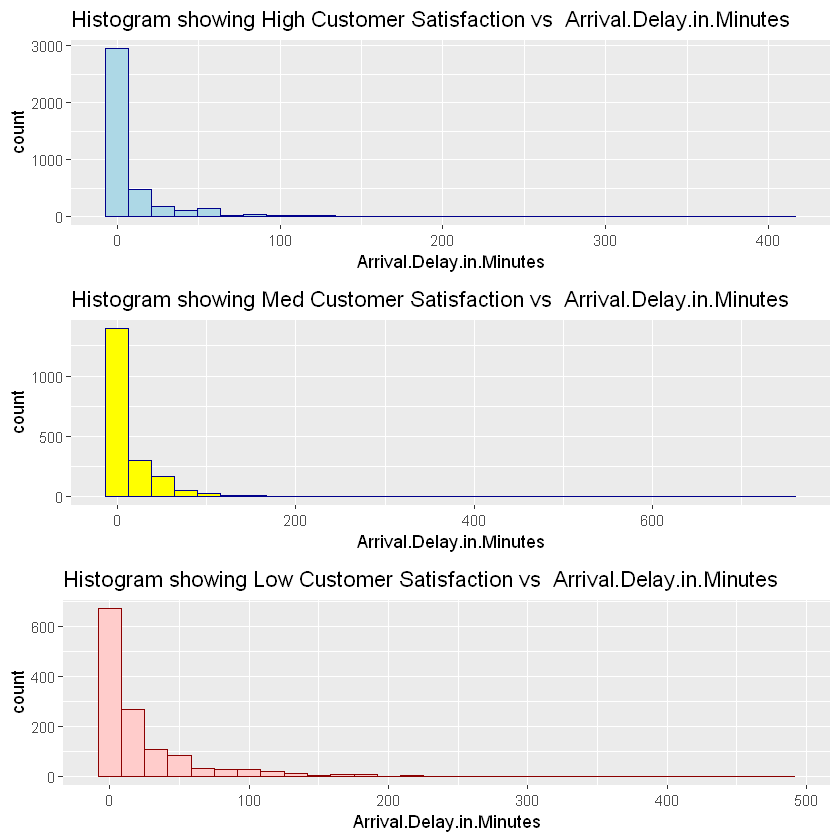

In [16]:
graph_num("Arrival.Delay.in.Minutes")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


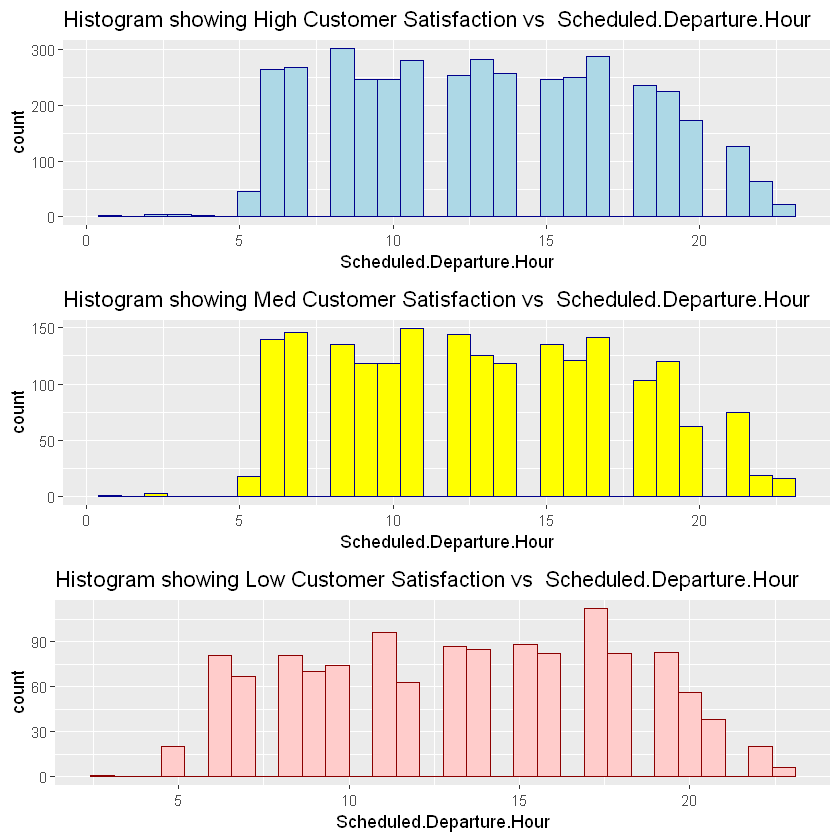

In [17]:
graph_num("Scheduled.Departure.Hour  ") # more analysis required

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


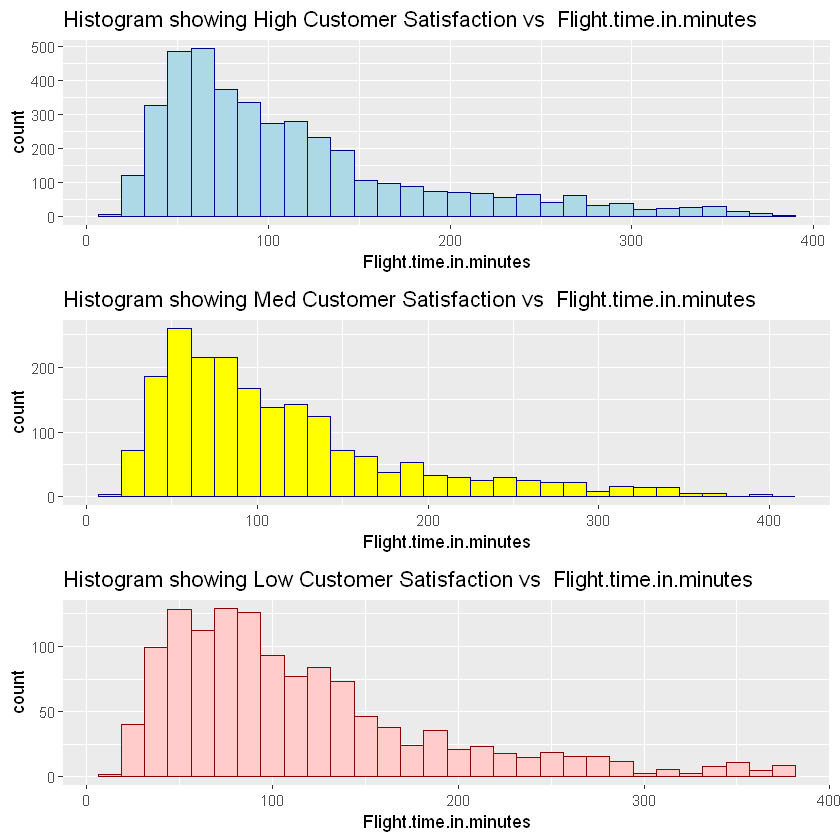

In [18]:
graph_num("Flight.time.in.minutes")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


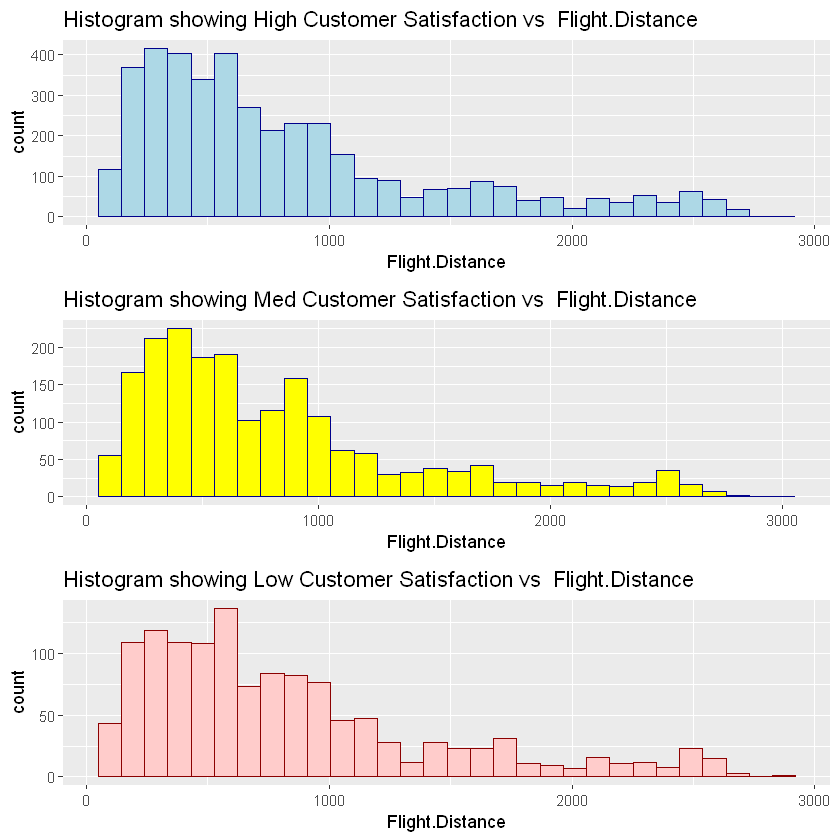

In [19]:
graph_num("Flight.Distance")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


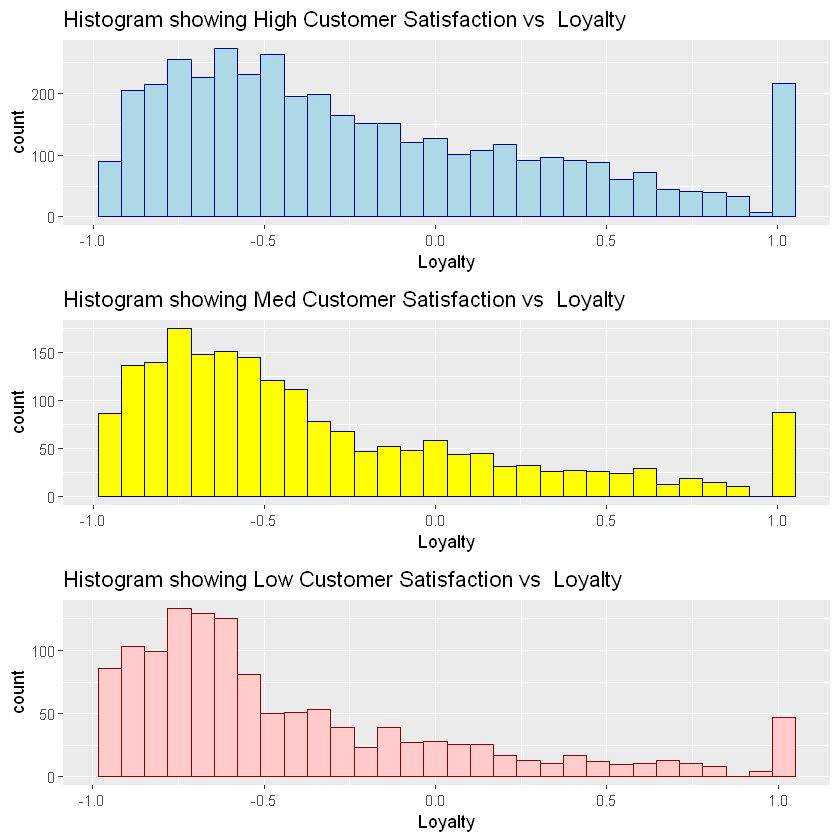

In [20]:
graph_num("Loyalty")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


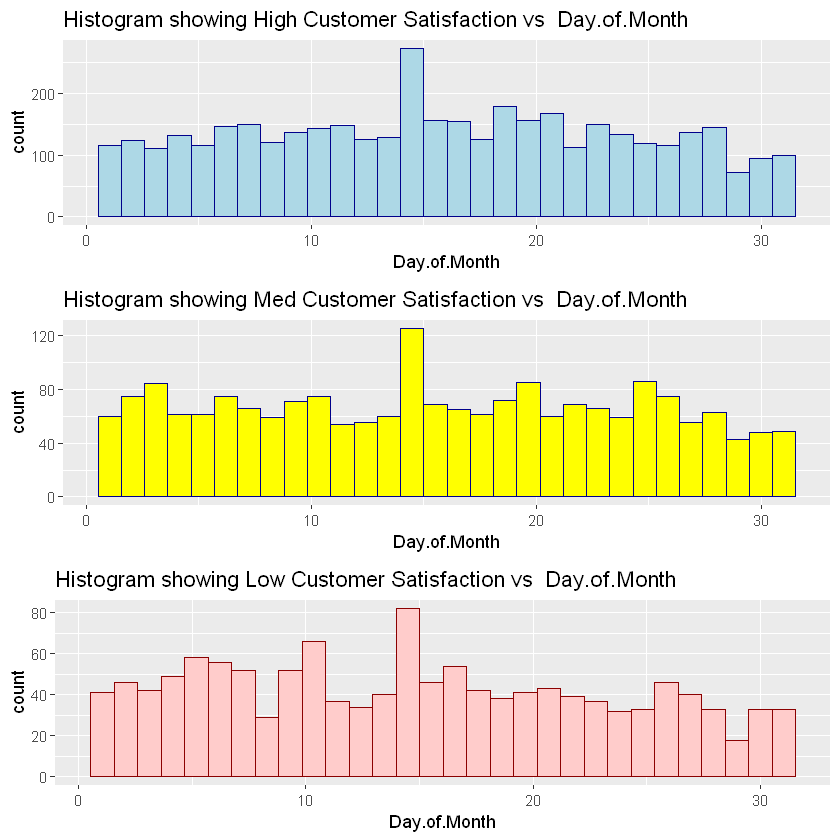

In [21]:
graph_num("Day.of.Month")

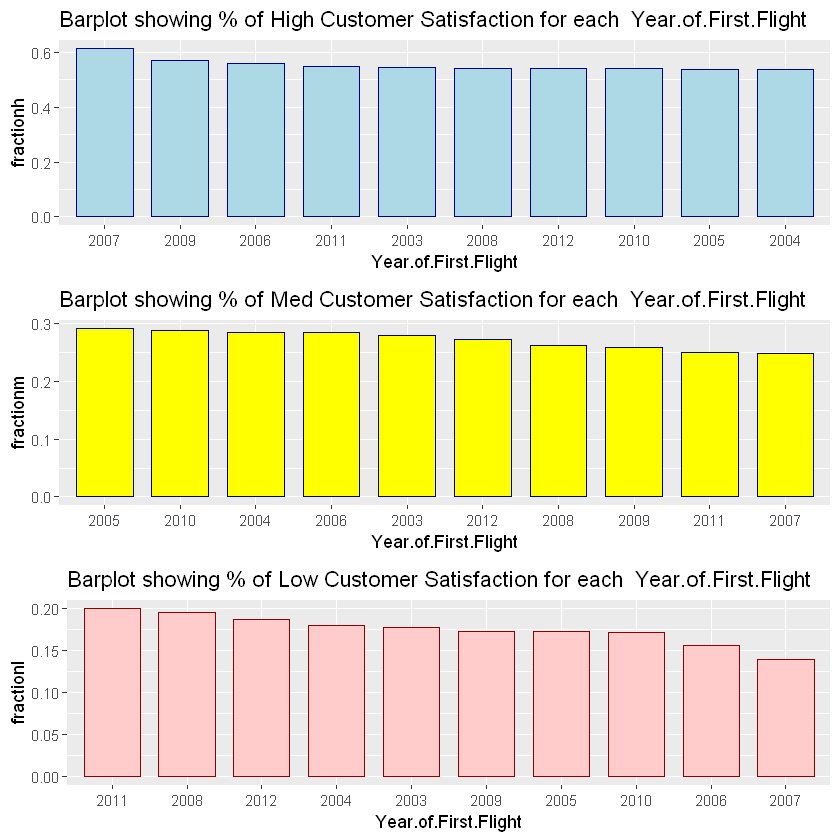

In [22]:
graph_factors("Year.of.First.Flight")

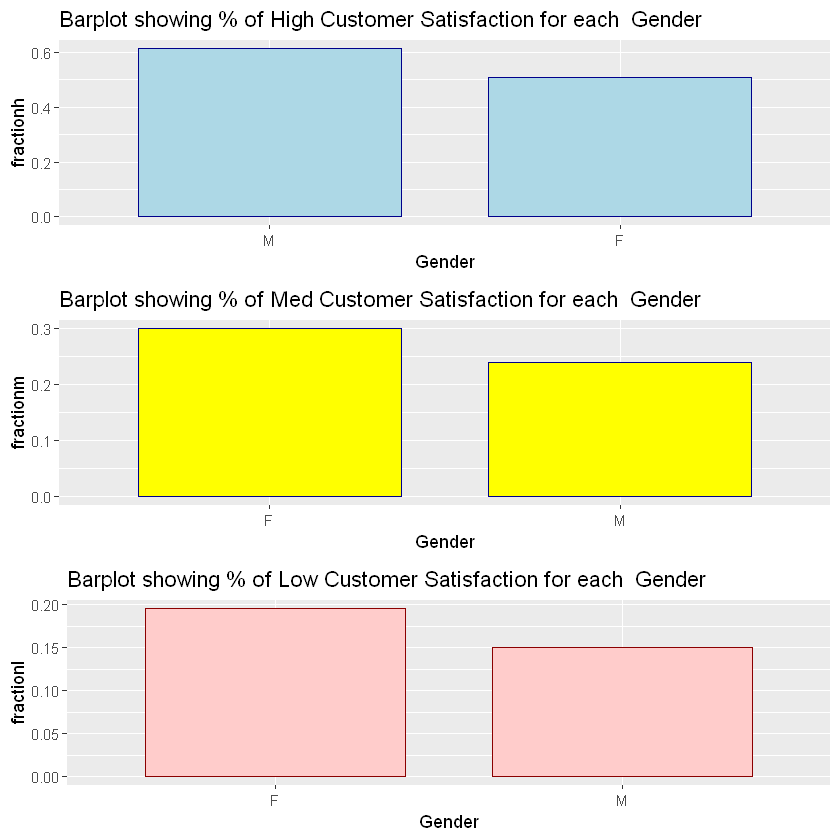

In [23]:
graph_factors("Gender")

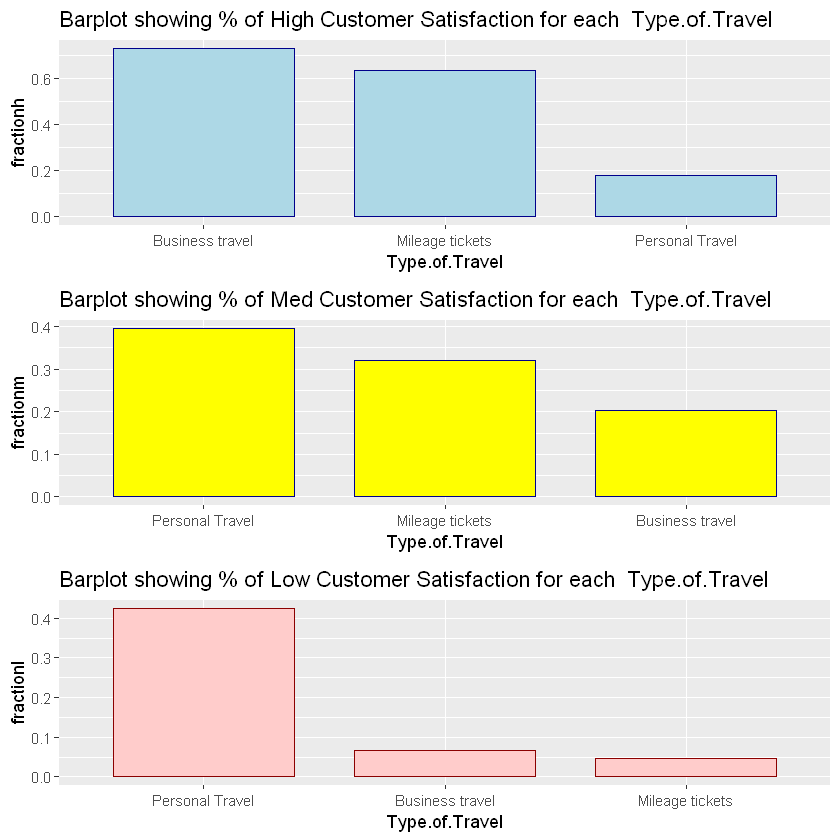

In [24]:
graph_factors("Type.of.Travel")

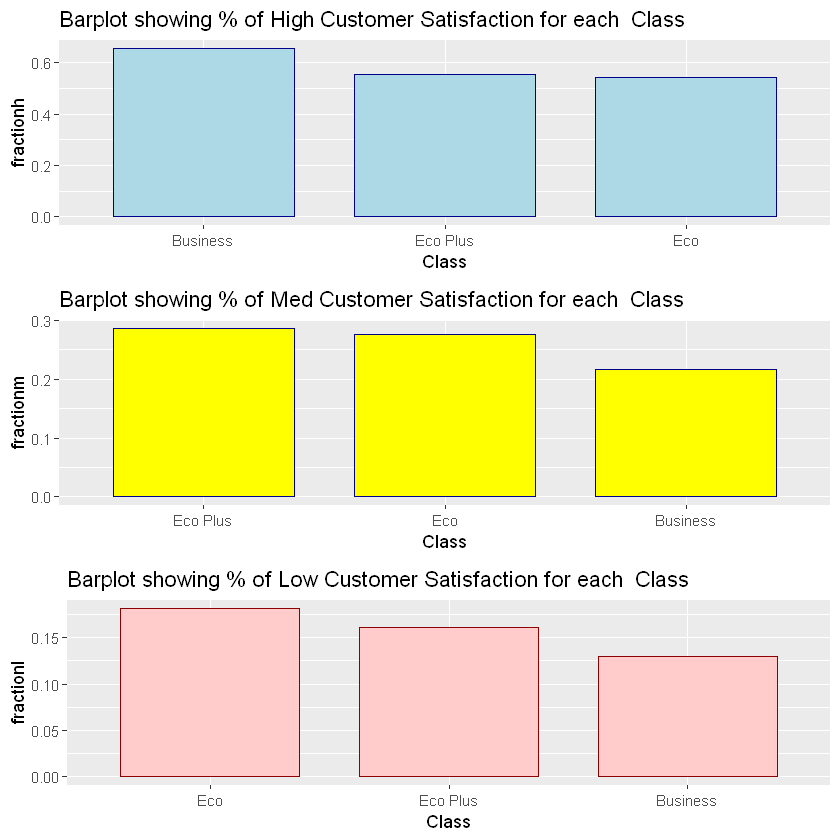

In [25]:
graph_factors("Class")

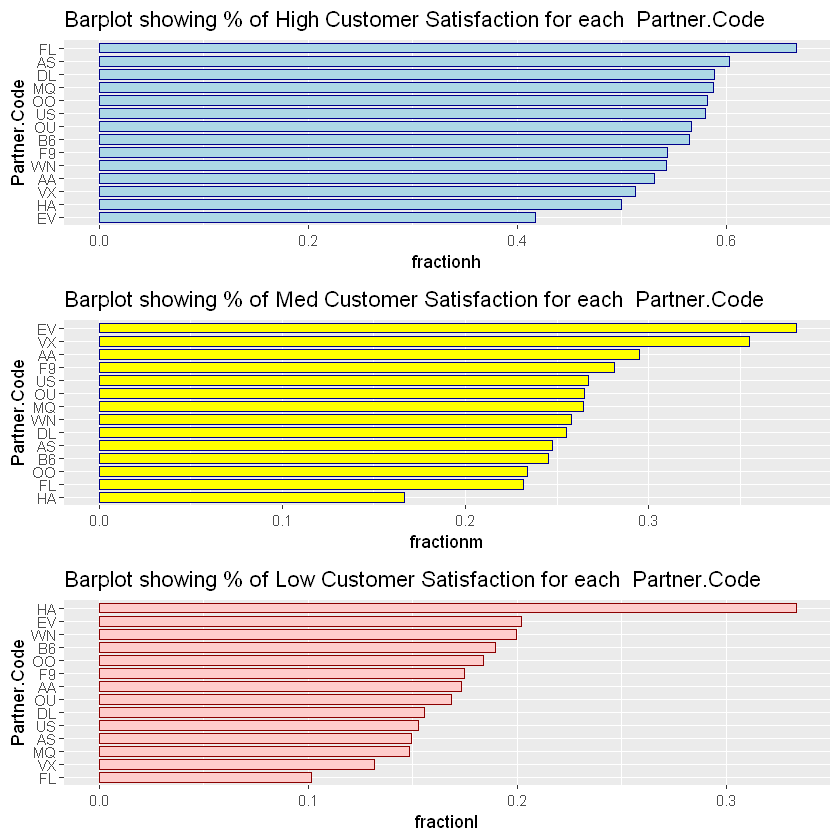

In [26]:
graph_factors("Partner.Code")

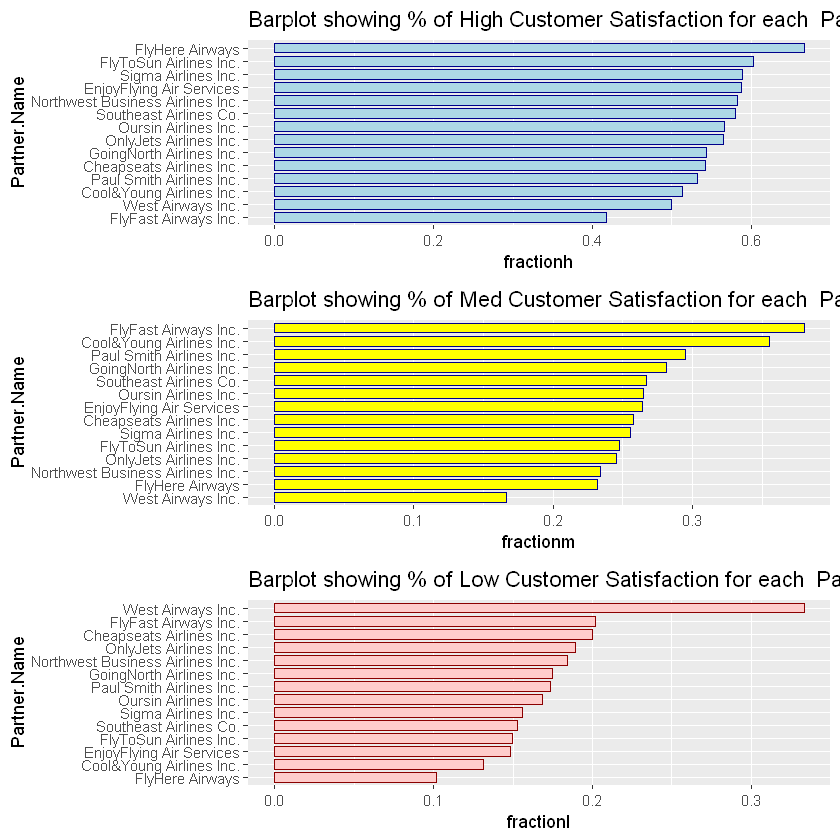

In [27]:
graph_factors("Partner.Name")

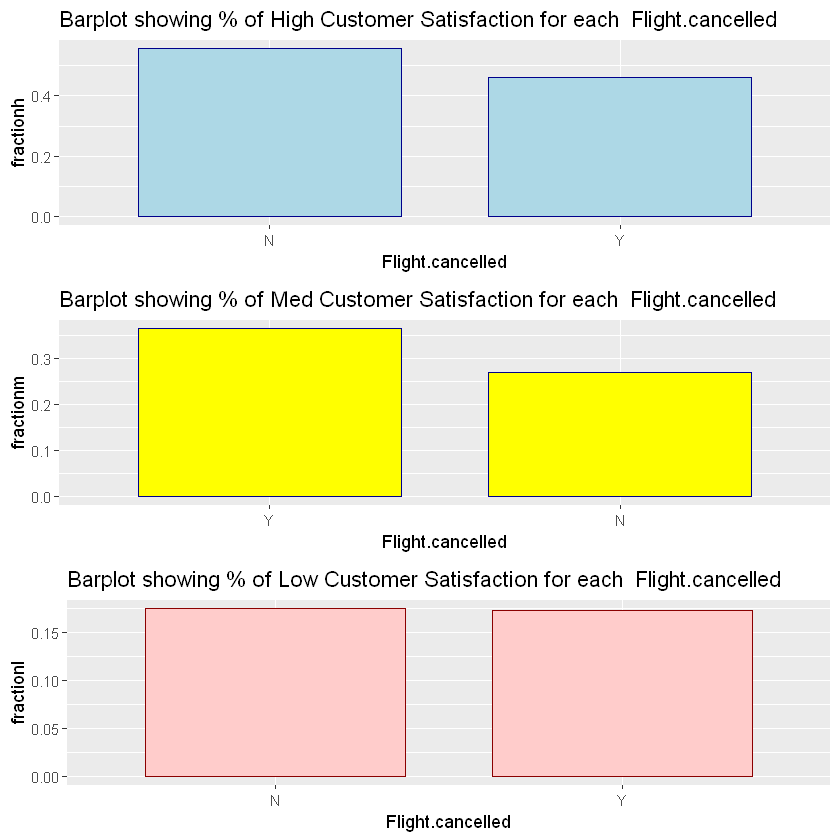

In [28]:
graph_factors("Flight.cancelled")

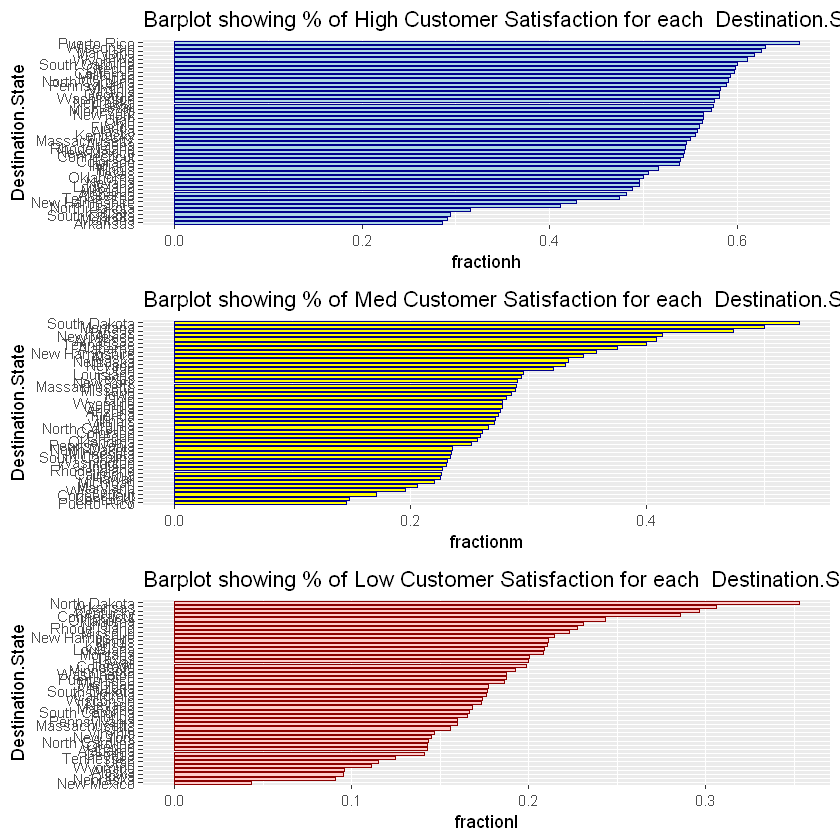

In [29]:
graph_factors("Destination.State")

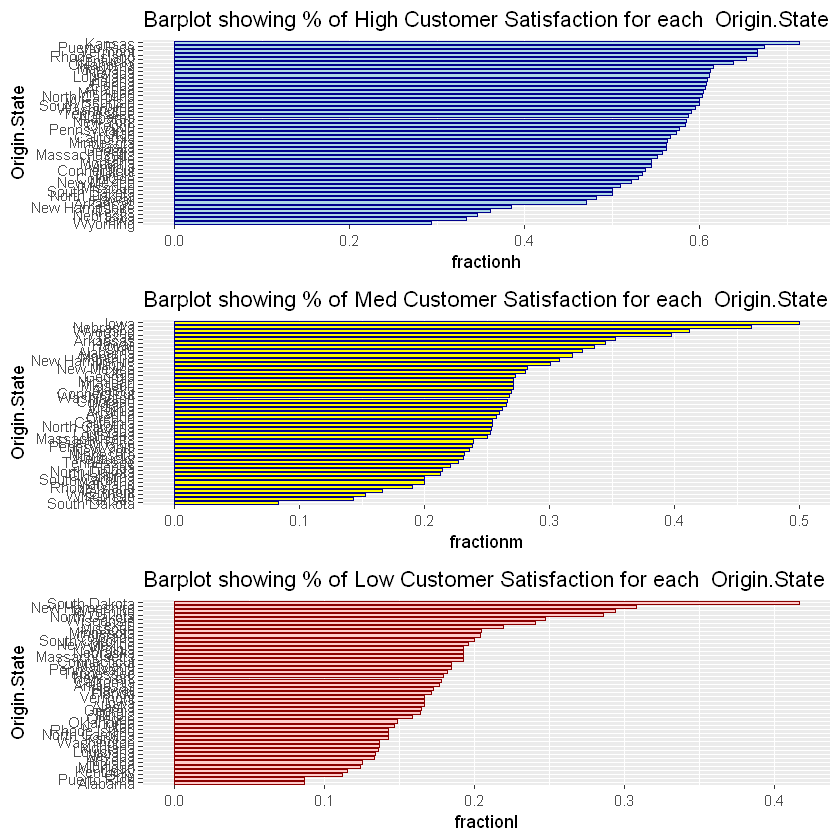

In [30]:
graph_factors("Origin.State")

In [31]:
saveRDS(train, file='train.rds')
saveRDS(test, file='test.rds')